In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

#### 1. Определяем форму датафрейма

In [3]:
db = pd.read_csv("train.csv", sep=",")
db.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [4]:
''' Определение формы датафрейма. '''
def df_info(input_dataframe):
    print(input_dataframe.info())
    return print("Форма: {}\n\nСтолбцы: {}\n\nИндексы: {}\n".format(input_dataframe.shape, 
                                                                      input_dataframe.columns, input_dataframe.index))


In [5]:
df_info(db)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB
None
Форма: (10000, 20)

Столбцы: Index(['Id', 'Distr

In [6]:
db.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [7]:
db_tmp = db.copy()


#### 2. Вводим фиктивные переменные

In [8]:
b = [ 'Ecology_2', 'Ecology_3', 'Shops_2']
for i in b:
    print(i)
    print(    db[i].value_counts()) 

Ecology_2
B    9903
A      97
Name: Ecology_2, dtype: int64
Ecology_3
B    9725
A     275
Name: Ecology_3, dtype: int64
Shops_2
B    9175
A     825
Name: Shops_2, dtype: int64


In [9]:
# AB = ("A","B")
def make_dummy(df, col):
    for i in col:
        print(i)
        maper = {
            "A": 0,
            "B": 1,
                }
        df[i] = df[i].map(maper)
    return df

In [10]:
b = ['Ecology_2', 'Ecology_3', 'Shops_2']
make_dummy(db_tmp, b)
db_tmp.info()

Ecology_2
Ecology_3
Shops_2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null int64
Ecology_3        10000 non-null int64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null int64
Price            10000 non-null float64
dtypes: float64(8), int64(12)
memory usage: 1.5 MB


#### 3. Убираем выбросы

       LifeSquare
4328  7480.592129
4690   410.639749
6977   638.163193
8437   461.463614


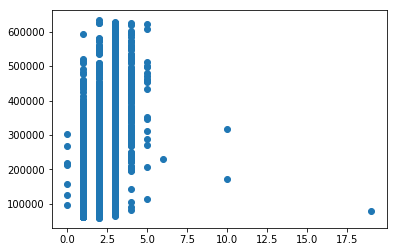

In [11]:
plt.scatter(db_tmp["Rooms"],db_tmp["Price"])
print(db.loc[db["LifeSquare"] > 400,["LifeSquare"]])

In [12]:
db_tmp.loc[(db_tmp["Rooms"] == 0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,1,1,11,3097,0,NaN,0,0,1,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,1,1,9,1892,0,NaN,0,1,1,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,1,1,9,1892,0,NaN,0,1,1,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,1,1,30,6207,1,1183.0,1,0,1,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,1,1,5,1564,0,540.0,0,0,1,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,1,1,2,469,0,NaN,0,0,1,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,1,1,43,8429,3,NaN,3,9,1,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,1,1,9,1892,0,NaN,0,1,1,219281.918007


In [13]:
x = 138
room_value = np.round(db_tmp.loc [ ( (db_tmp['Square'] <= x + 3) & (db_tmp['Square'] >= x - 3) ) , 'Rooms' ].mean())
print("room_value", room_value )
db_tmp.loc[(db_tmp["Id"] == 12638), "Rooms" ] = room_value



room_value 3.0


In [14]:
x = 39
room_value = np.round(db_tmp.loc [ ( (db_tmp['Square'] <= x + 3) & (db_tmp['Square'] >= x - 3) ) , 'Rooms' ].mean())
print("room_value", room_value )
db_tmp.loc[(db_tmp["Id"] == 3159), "Rooms" ] = room_value





room_value 1.0


In [15]:
x = 49
room_value = np.round(db_tmp.loc [ ( (db_tmp['Square'] <= x + 3) & (db_tmp['Square'] >= x - 3) ) , 'Rooms' ].mean())
print("room_value", room_value )
db_tmp.loc[(db_tmp["Id"] == 770), "Rooms" ] = room_value




room_value 2.0


In [16]:
db_tmp.loc[(db_tmp["Id"] == 3224), "Rooms" ] = 1

In [17]:
db_tmp.loc[(db_tmp["Id"] == 9443), "Rooms" ] = 3

In [18]:
x = 81
room_value = np.round(db_tmp.loc [ ( (db_tmp['Square'] <= x + 3) & (db_tmp['Square'] >= x - 3) ) , 'Rooms' ].mean())
print("room_value", room_value )
db_tmp.loc[(db_tmp["Id"] == 456), "Rooms" ] = room_value



room_value 3.0


In [19]:
x = 213
room_value = np.round(db_tmp.loc [ ( (db_tmp['Square'] <= x + 20) & (db_tmp['Square'] >= x - 20) ) , 'Rooms' ].mean())
print("room_value", room_value )
db_tmp.loc[(db_tmp["Id"] == 7917), "Rooms" ] = room_value


room_value 3.0


In [20]:
x = 42
room_value = np.round(db_tmp.loc [ ( (db_tmp['Square'] <= x + 3) & (db_tmp['Square'] >= x - 3) ) , 'Rooms' ].mean())
print("room_value", room_value )
db_tmp.loc[(db_tmp["Id"] == 7317), "Rooms" ] = room_value




room_value 1.0


In [284]:
'''
def room_0_to_x(db_tmp):
    room_0 = db_tmp.loc[(db_tmp["Rooms"] == 0), "Rooms" ]
    n = 0
    for i in range(len(room_0)-1):
        indx = int(room_0.index[i+n])
        print("id", indx )
        
        print(np.round(db_tmp.loc[indx, "Square"])
        square_rnd = np.round(db_tmp.loc[indx, "Square"])
        print("square_rnd", square_rnd )
        
        room_value = np.round(db_tmp.loc [ ( (db_tmp['Square'] <= square_rnd + 3) & (db_tmp['Square'] >= square_rnd - 3) ) , 'Rooms' ].mean())
        print("room_value", room_value )
        
        db_tmp.loc[(db_tmp["Id"] == indx), "Rooms" ] = room_value
        
        n=+1
    
    return db_tmp

room_0_to_x(db_tmp)
'''

'\ndef room_0_to_x(db_tmp):\n    room_0 = db_tmp.loc[(db_tmp["Rooms"] == 0), "Rooms" ]\n    n = 0\n    for i in range(len(room_0)-1):\n        indx = int(room_0.index[i+n])\n        print("id", indx )\n        \n        print(np.round(db_tmp.loc[indx, "Square"])\n        square_rnd = np.round(db_tmp.loc[indx, "Square"])\n        print("square_rnd", square_rnd )\n        \n        room_value = np.round(db_tmp.loc [ ( (db_tmp[\'Square\'] <= square_rnd + 3) & (db_tmp[\'Square\'] >= square_rnd - 3) ) , \'Rooms\' ].mean())\n        print("room_value", room_value )\n        \n        db_tmp.loc[(db_tmp["Id"] == indx), "Rooms" ] = room_value\n        \n        n=+1\n    \n    return db_tmp\n\nroom_0_to_x(db_tmp)\n'

In [21]:
db_tmp.loc[(db_tmp["Rooms"] > 6)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,1,1,74,19083,2,NaN,5,15,1,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,1,1,1,264,0,NaN,0,1,1,78364.616704
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,1,1,25,5648,1,30.0,2,4,1,172329.270863


In [22]:
sq60m = np.round(db_tmp.loc [ ( (db_tmp['Square'] <= 62) & (db_tmp['Square'] >= 58) ) , 'Rooms' ].mean())
print(sq60m)
db_tmp.loc[(db_tmp["Rooms"] == 10), "Rooms" ] = sq60m

2.0


In [23]:
sq42m = np.round(db_tmp.loc [ ( (db_tmp['Square'] <= 44) & (db_tmp['Square'] >= 40) ) , 'Rooms' ].mean())
print(sq42m)
db_tmp.loc[(db_tmp["Rooms"] == 19), "Rooms" ] = sq42m

1.0


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,1,1,66,10573,1,1322.0,3,8,1,229661.964416


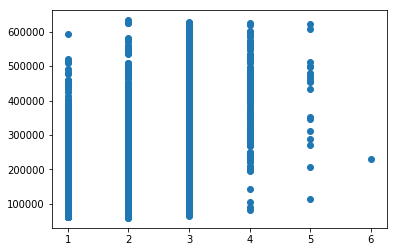

In [24]:
plt.scatter(db_tmp["Rooms"],db_tmp["Price"])
db_tmp.loc[(db_tmp["Rooms"] > 5)]

In [25]:
def print_scatter(df, col):
    for i in col:
        print("Разброс параметра", i)
        plt.scatter(df[i],df["Price"])
        plt.show()


Разброс параметра Square


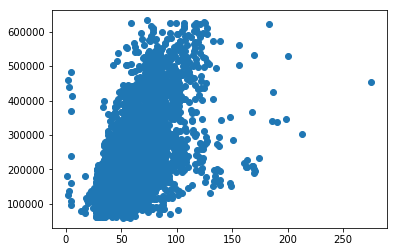

Разброс параметра LifeSquare


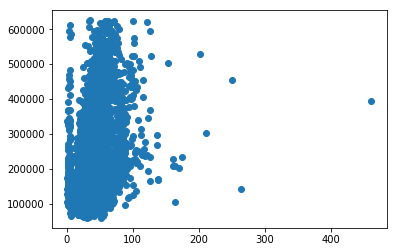

Разброс параметра KitchenSquare


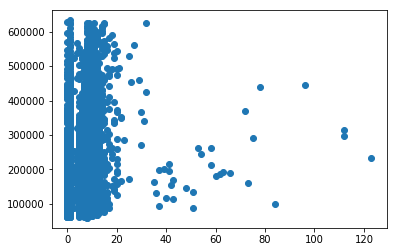

Разброс параметра Floor


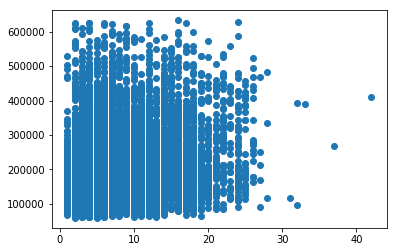

Разброс параметра HouseFloor


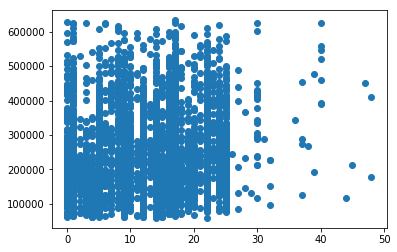

Разброс параметра HouseYear


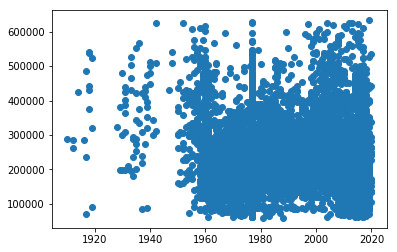

Разброс параметра Ecology_1


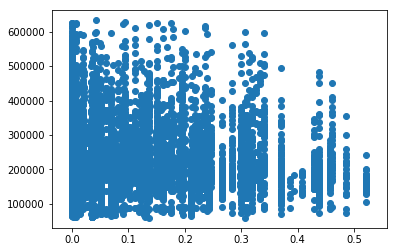

Разброс параметра Ecology_2


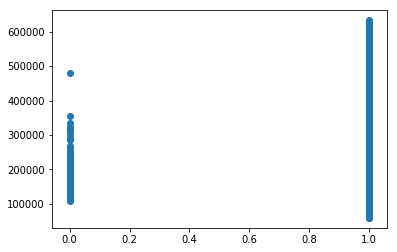

Разброс параметра Ecology_3


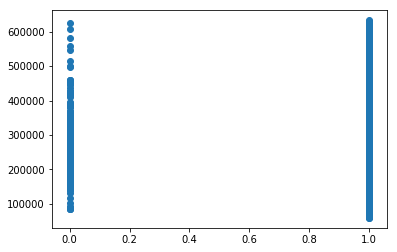

Разброс параметра Social_1


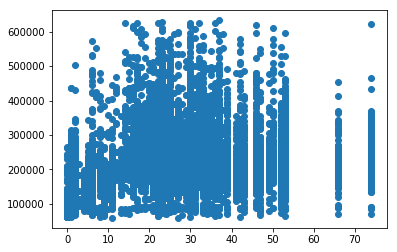

Разброс параметра Social_2


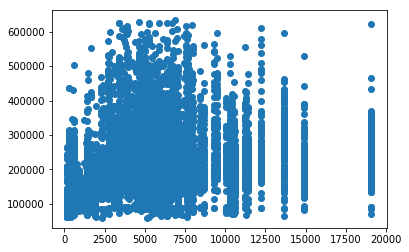

Разброс параметра Social_3


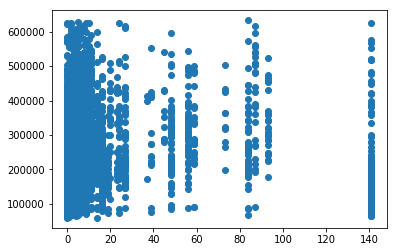

Разброс параметра Healthcare_1


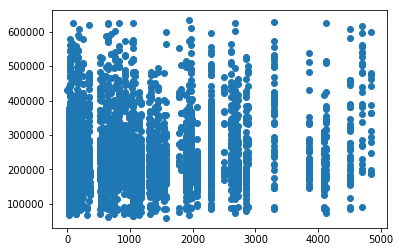

Разброс параметра Helthcare_2


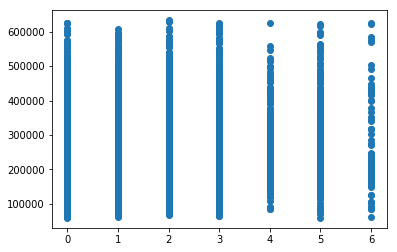

Разброс параметра Shops_1


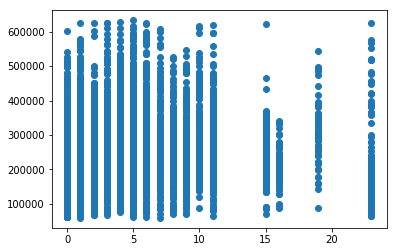

Разброс параметра Shops_2


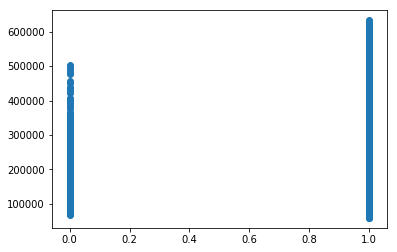

In [51]:
col = ('Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2')
print_scatter(db_tmp, col)

In [27]:
print(db_tmp.loc[(db_tmp["Square"] > 250)])

db_tmp.loc[(db_tmp["Id"] == 2307), "Square" ] = 40
db_tmp.loc[(db_tmp["Id"] == 2307), "LifeSquare" ] = 41
db_tmp.loc[(db_tmp["Id"] == 2307), "KitchenSquare" ] = 5


db_tmp.loc[(db_tmp["Id"] == 5548), "LifeSquare" ] = 250
db_tmp.loc[(db_tmp["Id"] == 11602), "LifeSquare" ] = 600

print(db_tmp.loc[(db_tmp["Square"] > 250)])

         Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
1982   5548          86    5.0  275.645284  233.949309           26.0     12   
4262     28           9    2.0  604.705972         NaN            1.0     17   
4690   2307         102    1.0  409.425181  410.639749           10.0      4   
6977  11602          30    2.0  641.065193  638.163193           10.0     20   

      HouseFloor  HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  \
1982        37.0       2011   0.161976          1          0        31   
4262        18.0       1977   0.161532          1          1        25   
4690         4.0       2016   0.238617          1          1        26   
6977        19.0       2019   0.000078          1          1        22   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2  \
1982      7010         5        4508.0            3        7        1   
4262      5648         1          30.0            2        4        1   
4690     

In [47]:
db_tmp.loc[(db_tmp["LifeSquare"] > 500)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [48]:
db_tmp.loc[(db_tmp["Square"] > 500)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,1,1,25,5648,1,30.0,2,4,1,187717.242538


(array([ 61.,  80., 133., 199., 165., 279., 299., 393., 451., 481., 556.,
        612., 681., 659., 566., 477., 427., 358., 342., 323., 224., 203.,
        178., 164., 153., 121., 122., 123., 102., 110.,  90.,  86.,  75.,
         76.,  52.,  58.,  50.,  45.,  53.,  40.,  31.,  35.,  30.,  33.,
         24.,  25.,  26.,  16.,  19.,  11.,  13.,   9.,  10.,  10.,   9.,
          6.,   8.,   5.,   5.,   8.]),
 array([ 59174.77802758,  68742.42283662,  78310.06764566,  87877.7124547 ,
         97445.35726374, 107013.00207278, 116580.64688182, 126148.29169086,
        135715.9364999 , 145283.58130894, 154851.22611798, 164418.87092702,
        173986.51573605, 183554.16054509, 193121.80535413, 202689.45016317,
        212257.09497221, 221824.73978125, 231392.38459029, 240960.02939933,
        250527.67420837, 260095.31901741, 269662.96382645, 279230.60863549,
        288798.25344453, 298365.89825357, 307933.54306261, 317501.18787165,
        327068.83268069, 336636.47748972, 346204.12229876,

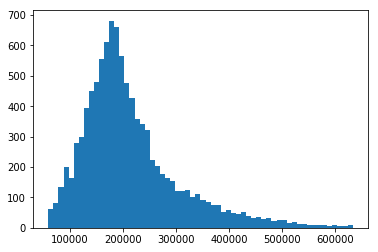

In [29]:
plt.hist(db_tmp["Price"], bins=60)

In [40]:
db_tmp.loc[(db_tmp["KitchenSquare"] > 200)]



,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [41]:
db_tmp.loc[(db_tmp["HouseFloor"] > 60)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [32]:
db_tmp.loc[(db_tmp["HouseYear"] > 2020)]
db_tmp.loc[(db_tmp["HouseYear"] > 2020), "HouseYear" ] = 2011

In [33]:

def clean_data_3std(df, columns):
    for i in columns:
        mean = np.round(df[i].mean())
        std3 = 3 * np.round(df[i].std())
        conf_interval = mean + std3
        print("Среднее по ", i , mean)
        print("+3 сигма ",mean + std3)
        
        #df.loc[ ((df[i] < (mean - std3)) | df[i].isnull() | ( df[i] > (mean + std3) )), i ] = mean
    

    

In [34]:
col2 = ('Square', 'LifeSquare', 'KitchenSquare', 'HouseFloor')
clean_data_3std(db_tmp, col2)

Среднее по  Square 56.0
+3 сигма  119.0
Среднее по  LifeSquare 37.0
+3 сигма  295.0
Среднее по  KitchenSquare 6.0
+3 сигма  93.0
Среднее по  HouseFloor 13.0
+3 сигма  34.0


In [35]:
print(db_tmp.loc[(db_tmp["HouseYear"] == 1977), "HouseFloor"].mode() )
HouseFloor1977_mode = db_tmp.loc[(db_tmp["HouseYear"] == 1977), "HouseFloor"].mode()
db_tmp.loc[(db_tmp["HouseFloor"] > 60), "HouseFloor"] = HouseFloor1977_mode

0    17.0
dtype: float64


In [36]:
print(db_tmp.loc[(np.round(db_tmp["LifeSquare"]) == 46), "KitchenSquare"].mode() )
print(db_tmp.loc[(np.round(db_tmp["LifeSquare"]) == 46), "KitchenSquare"].mean() )
# HouseFloor1977_mode = db_tmp.loc[(db_tmp["HouseYear"] == 1977), "HouseFloor"].mode()
db_tmp.loc[(db_tmp["KitchenSquare"] > 200), "KitchenSquare"] = 7.9

0    10.0
dtype: float64
19.100558659217878


In [49]:
print(np.round(db_tmp.loc[ (np.round (db_tmp["LifeSquare"]) == 56),  "Square"]).mode() )
print(db_tmp.loc[(np.round(db_tmp["LifeSquare"]) == 56), "Square"].mean() )

db_tmp.loc[(db_tmp["Id"] == 16550), "LifeSquare"] = 75
db_tmp.loc[(db_tmp["Id"] == 11602), "LifeSquare"] = 60
db_tmp.loc[(db_tmp["Id"] == 11602), "Square"] = 64
db_tmp.loc[(db_tmp["Id"] == 28), "Square"] = 60


0    58.0
dtype: float64
75.2969655542866


In [38]:
db_tmp.loc[ (np.round (db_tmp["LifeSquare"]) == 56),  "Square"].mean()
#db_tmp.loc[(db_tmp["Square"] > 200), "Square"] = 105

75.2969655542866

Разброс параметра Square


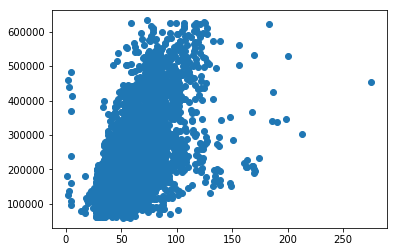

Разброс параметра LifeSquare


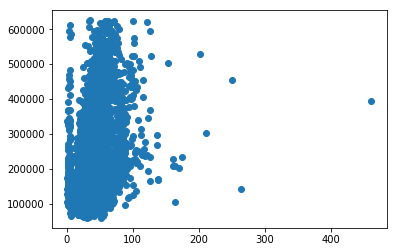

Разброс параметра KitchenSquare


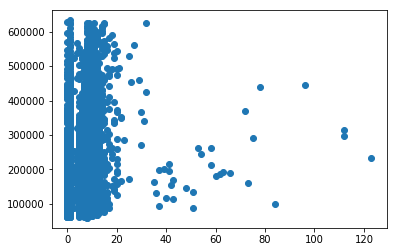

Разброс параметра HouseFloor


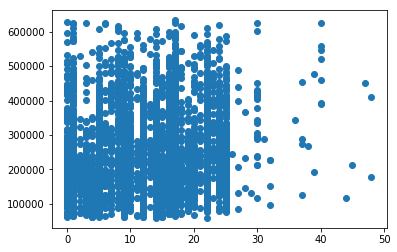

In [50]:
print_scatter(db_tmp, col2)

#### 4. Убираем пропуски в данных

In [52]:

print("Медиана\n",db_tmp.median())
db_tmp.info()

Медиана
 Id                 8394.500000
DistrictId           36.000000
Rooms                 2.000000
Square               52.509275
LifeSquare           32.781260
KitchenSquare         6.000000
Floor                 7.000000
HouseFloor           13.000000
HouseYear          1977.000000
Ecology_1             0.075424
Ecology_2             1.000000
Ecology_3             1.000000
Social_1             25.000000
Social_2           5285.000000
Social_3              2.000000
Healthcare_1        900.000000
Helthcare_2           1.000000
Shops_1               3.000000
Shops_2               1.000000
Price            192269.644879
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor        

In [53]:
print(db_tmp.loc[(db_tmp["HouseFloor"].isnull())])
db_tmp.loc[(db_tmp["Id"] == 10806), "HouseFloor" ] = 5
db_tmp.loc[(db_tmp["Id"] == 9300), "HouseFloor" ] = 17
db_tmp.loc[(db_tmp["Id"] == 78), "HouseFloor" ] = 17

         Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
6131  10806           5    1.0  51.944587   48.709601            1.0      6   
8599   9300          74    2.0  71.747869   74.579809            9.0      5   
8854     78          30    2.0  65.773749   66.811789            1.0      8   

      HouseFloor  HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  \
6131         NaN       1977   0.150818          1          1        16   
8599         NaN       1977   0.075779          1          1         6   
8854         NaN       1977   0.000078          1          1        22   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2  \
6131      3433         4        2643.0            4        5        1   
8599      1437         3           NaN            0        2        1   
8854      6398       141        1046.0            3       23        1   

              Price  
6131  296127.115515  
8599  243329.912579  
8854  207248.370520  


In [54]:
db_2 = db_tmp.copy()

In [55]:
a = db_2.loc[(db_2["LifeSquare"].notnull()), "Square"] / db_2.loc[(db_2["LifeSquare"].notnull()), "LifeSquare"] 
print(a.mean(), np.round(a).mode())

2.1256388309848413 0    2.0
dtype: float64


In [56]:
db_2.loc[(db_2['LifeSquare'].isnull()), 'LifeSquare'] = db_2['Square']/a.mean()

In [57]:
print("Медиана\n",db_2.median())
db_2.info()

Медиана
 Id                 8394.500000
DistrictId           36.000000
Rooms                 2.000000
Square               52.509275
LifeSquare           31.293528
KitchenSquare         6.000000
Floor                 7.000000
HouseFloor           13.000000
HouseYear          1977.000000
Ecology_1             0.075424
Ecology_2             1.000000
Ecology_3             1.000000
Social_1             25.000000
Social_2           5285.000000
Social_3              2.000000
Healthcare_1        900.000000
Helthcare_2           1.000000
Shops_1               3.000000
Shops_2               1.000000
Price            192269.644879
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor       

In [58]:
db_2.loc[(db_2['Healthcare_1'].isnull()), 'Healthcare_1'] = 0

In [59]:
db_3 = db_2.copy()
#db_3 = db_3.drop("Healthcare_1", axis=1)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,8.903972e-02,1,1,33,7976,5,0,11,1,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,6.998930e-05,1,1,46,10309,1,1,16,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,4.963726e-02,1,1,34,7759,0,1,3,1,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,4.378852e-01,1,1,23,5735,3,0,5,1,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,1.233889e-02,1,1,35,5776,1,2,4,1,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,3.094791e-01,1,1,35,7715,4,0,6,1,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,4.605564e-01,1,1,20,4386,14,1,5,1,296021.204377
7,11993,74,2.0,80.312926,37.768307,0.0,14,0.0,1977,7.577876e-02,1,1,6,1437,3,0,2,1,221244.156664
8,5172,1,2.0,64.511437,30.337430,1.0,9,17.0,1977,7.122317e-03,1,1,1,264,0,0,1,1,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,7.577876e-02,1,1,6,1437,3,0,2,1,95380.220993


#### Выявляем кореллирующие признаки

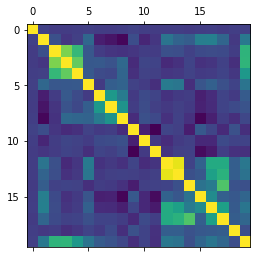

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,1,0.0129728,-0.00781496,-0.00576658,0.00246452,0.0106635,0.00134772,-0.00697149,0.00363382,0.0180973,0.00309897,-0.00540799,-0.000771554,-0.00203318,-0.00935794,-0.00255998,0.00150182,-0.00871771,0.00364463,0.00988026
DistrictId,0.0129728,1,0.075972,-0.0274359,0.0072903,0.185724,-0.120373,-0.151889,-0.2005,0.065294,-0.0934062,-0.0279019,0.246463,0.167479,0.136095,0.301897,0.306147,0.174214,-0.0210178,0.2651
Rooms,-0.00781496,0.075972,1,0.760743,0.592359,0.109168,-0.00681722,-0.0338015,-0.0439135,-0.0306354,-0.00224316,-0.00645694,0.0772738,0.0717614,0.0138435,0.0518963,0.0633082,0.0532934,-0.000778341,0.571358
Square,-0.00576658,-0.0274359,0.760743,1,0.708085,0.115593,0.1167,0.0880568,0.189853,-0.0708579,0.0321379,0.0237058,-0.0774678,-0.0477092,0.0229442,-0.0469691,-0.0321052,0.0111445,-0.0566361,0.577893
LifeSquare,0.00246452,0.0072903,0.592359,0.708085,1,0.120246,0.0542578,0.0418562,0.177327,-0.0514181,0.0182484,0.0108403,-0.0314486,-0.0185688,0.0193007,-0.0131733,-0.00639891,0.0214185,-0.0232635,0.429349
KitchenSquare,0.0106635,0.185724,0.109168,0.115593,0.120246,1,-0.0110538,0.141847,0.16738,0.0200208,-0.00611945,-0.0566266,0.278136,0.25507,-0.0593215,0.0988813,0.153602,0.0765369,0.0223255,0.247988
Floor,0.00134772,-0.120373,-0.00681722,0.1167,0.0542578,-0.0110538,1,0.432927,0.284264,-0.016133,0.0496614,0.0257672,-0.0449136,-0.0165596,-0.00223667,-0.115151,-0.0655365,0.0242643,-0.013626,0.128715
HouseFloor,-0.00697149,-0.151889,-0.0338015,0.0880568,0.0418562,0.141847,0.432927,1,0.40612,-0.00290617,0.060669,0.00882402,-0.019142,0.0089087,-0.0163453,-0.10488,-0.0739112,0.0214653,0.0512375,0.0893238
HouseYear,0.00363382,-0.2005,-0.0439135,0.189853,0.177327,0.16738,0.284264,0.40612,1,-0.0660872,0.0768287,0.0472062,-0.0478938,0.0136289,-0.0493026,-0.207962,-0.115746,-0.00194899,-0.058743,0.0367043
Ecology_1,0.0180973,0.065294,-0.0306354,-0.0708579,-0.0514181,0.0200208,-0.016133,-0.00290617,-0.0660872,1,-0.110725,-0.223197,0.0264641,0.00926363,-0.124068,0.115533,0.0308729,-0.0767492,0.0798085,-0.0583807


In [60]:
X_corr = db_2.corr()
plt.matshow(X_corr)
plt.show()
X_corr.style.background_gradient(cmap='coolwarm')

#### Обучаем отобранную ранее модель

In [61]:
train, valid = train_test_split(db_2, test_size=0.3, random_state=42)
feats = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2']

In [62]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score as r2

In [63]:
def evaluate_model(model, train, valid, metric, feats, target, max_depth, n_estimators, max_features):
    dtr = model(max_depth=max_depth, n_estimators = n_estimators , max_features = max_features)
    dtr.fit(train.loc[:, feats], train[target])
    y_pred_train = dtr.predict(train.loc[:, feats])
    y_pred_valid = dtr.predict(valid.loc[:, feats])
    metric_train = metric(train[target], y_pred_train)
    metric_valid = metric(valid[target], y_pred_valid)
    #print('MaxDepth: {}\nTrain: {}, \nValid: {}\n'.format(max_depth, metric_train, metric_valid))
    return metric_train, metric_valid, dtr

In [95]:
evaluate_model(model=RFR, train=train, valid=valid, metric=r2, feats=feats, target='Price', 
               max_depth=100, n_estimators = 1000, max_features = 5)

(0.9655309950444796,
 0.7305961442289612,
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False))

In [96]:
# модель с отобранными параметрами
dtr = RFR(max_depth=80, n_estimators = 1000, max_features = 5).fit(train.loc[:, feats], train["Price"])

#### Тестирование моделей GridSearchCV. Не используется для финального предсказания.

In [333]:
X = db_2.copy()
X.drop("Price", axis=1, inplace=True)
X.drop("Id", axis=1, inplace=True)

y = db_2["Price"]

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100 )

In [380]:
tuned_parameters = {'n_estimators': [100, 500, 800 ],        # , 1500, 2000, 3000, 5000],
                    'max_features': np.arange(3, 18),
                    'max_depth': [50, 60, 80, ]  }   # 100, 200]}
clf = GridSearchCV(estimator=RFR(), param_grid=tuned_parameters, cv=9, 
                   n_jobs=-1, verbose=1, scoring='r2' )

In [381]:
clf.fit(X_train, y_train)

Fitting 9 folds for each of 135 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 418.6min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed: 457.2min finished


GridSearchCV(cv=9, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 500, 800], 'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]), 'max_depth': [50, 60, 80]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=1)

In [382]:
clf.best_params_

{'max_depth': 80, 'max_features': 5, 'n_estimators': 500}

In [98]:
y_pred = clf.predict(X_test)

NameError: name 'clf' is not defined

In [97]:
ref = r2(y_test, y_pred)
print(ref)

NameError: name 'y_test' is not defined

In [327]:
# 
r2(train['Price'], y_pred_train)

NameError: name 'y_pred_train' is not defined

In [323]:

evaluate_model(model=DTR, train=train, valid=valid, metric=r2, feats=feats, target='Price', 
               max_depth=7)

(0.7164075634768439, 0.6215902035312737)

In [320]:
def check_param(min_value, max_value, model, train=train, valid=valid, metric=r2, feats=feats, 
                             target='Price'):
    max_depth_arr = []
    metric_train_arr = []
    metric_valid_arr = []

    for i in range(min_value, max_value+1):
        res = evaluate_model(model, train, valid, metric, feats, 
                             target, max_depth=i)
        max_depth_arr.append(i)
        metric_train_arr.append(res[0])
        metric_valid_arr.append(res[1])
    return max_depth_arr, metric_train_arr, metric_valid_arr

In [336]:
max_depth_arr, metric_train_arr, metric_valid_arr = check_param(min_value=1, max_value=14, model=RFR)

In [ ]:
plt.plot(max_depth_arr, metric_train_arr)
plt.plot(max_depth_arr, metric_valid_arr)

In [334]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import GridSearchCV

In [332]:
X = db_2.copy()
X.drop("Price", axis=1, inplace=True)
X.drop("Id", axis=1, inplace=True)

y = db_2["Price"]

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100 )

In [71]:
parameters = {
    'n_estimators': [150, 200, 250],
    'max_features': np.arange(5, 9),
    'max_depth': np.arange(5, 10),
}

clf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=parameters,
    scoring='accuracy',
    cv=5,
)

In [420]:
X = db_3.copy()
X.drop("Price", axis=1, inplace=True)
y = db_tmp["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 100 )

In [ ]:
tuned_parameters = {'n_estimators': [100 ] # , 1500, 2000, 3000, 5000],
                    'max_features': np.arange(5, 20, 5),
                    'max_depth': [60, 70, 80, ] # 100, 200]}
clf = GridSearchCV(estimator=RFR(), param_grid=tuned_parameters, cv=9, 
                   n_jobs=-1, verbose=1, scoring='r2' )

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
clf.best_params

In [424]:
y_pred = clf.predict(X_test)

In [425]:
from sklearn.metrics import roc_auc_score
ref = r2(y_test, y_pred)
print(ref)

0.7243377624038652


#### Готовим данные для прогноза

In [68]:
predictions = pd.read_csv("test.csv", sep=",")

In [70]:
make_dummy(predictions, b)

Ecology_2
Ecology_3
Shops_2


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,NaN,0,0,1
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,1,1,6,1437,3,NaN,0,2,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,NaN,3,3,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1,1,2,629,1,NaN,0,0,0
5,7633,53,1.0,40.675627,NaN,1.0,21,21.0,1977,0.049637,1,1,34,7759,0,229.0,1,3,1
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,1,1,6,1437,3,NaN,0,2,1
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,1,1,46,7960,6,350.0,3,11,1
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,1,1,53,14892,4,NaN,1,4,1
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,1,1,5,1564,0,540.0,0,0,1


In [71]:
predictions.loc[(predictions['LifeSquare'].isnull()), 'LifeSquare'] = predictions['Square']/a.mean()

In [76]:
predictions.loc[(predictions['Healthcare_1'].isnull()), 'Healthcare_1'] = 0

In [77]:

predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null int64
Ecology_3        5000 non-null int64
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     5000 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null int64
dtypes: float64(7), int64(12)
memory usage: 742.3 KB


In [78]:
predictions.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,34.551298,5.976800,8.632000,12.601000,1984.392600,0.119874,0.990400,0.970200,24.933800,5406.900000,8.262600,601.536400,1.31940,4.242800,0.917600
std,4832.674037,44.179466,0.838594,19.092787,16.674450,9.950018,5.483228,6.789213,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,948.929796,1.47994,4.777365,0.275001
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,22.684741,1.000000,4.000000,9.000000,1973.000000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.000000,0.000000,0.00000,1.000000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,31.478330,6.000000,7.000000,12.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,30.000000,1.00000,3.000000,1.000000
75%,12598.250000,77.000000,2.000000,66.285129,42.470994,9.000000,12.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,1.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000


In [79]:
predictions.loc[(predictions["Rooms"] > 6)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,1,1,23,4635,5,3300.0,2,4,1


In [ ]:
predictions.loc[(predictions["Rooms"] > 6)]

In [84]:
predictions.loc[(predictions["KitchenSquare"] > 100)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1777,3341,62,3.0,112.114019,112.247841,112.0,3,3.0,2017,0.072158,1,1,2,629,1,0.0,0,0,0
1964,14594,11,2.0,42.795304,24.223770,620.0,11,14.0,1972,0.038693,1,1,28,6533,1,1015.0,2,5,1


In [88]:
predictions.loc[(predictions["Id"] == 1435), "Rooms"] = 2
predictions.loc[(predictions["Id"] == 14594), "KitchenSquare"] = 6
predictions.loc[(predictions["Id"] == 3341), "KitchenSquare"] = 12




#### Итоговая модель и экспорт в файл

In [99]:
answer = dtr.predict(predictions.loc[:, feats])

In [100]:
type(answer)

numpy.ndarray

In [101]:
result = pd.Series(answer, index=predictions["Id"])

In [102]:
result_df = pd.DataFrame(
    {'Price': answer},
    index=predictions["Id"],
)

In [103]:
result_df.to_csv("DDyachenko_predictions.csv", sep=",")